In [1]:
import numpy as np
from numpy.linalg import norm
import pickle
import matplotlib
import matplotlib.pyplot as plt
import itertools
from scipy.stats import norm as norm_d
from scipy.stats import expon
from scipy.stats import weibull_min as weibull
from scipy.stats import burr12 as burr
from scipy.stats import randint
from scipy.stats import uniform
from scipy.optimize import minimize
import copy
import math
import time
from scipy.optimize import minimize
from scipy.sparse.linalg import svds
from scipy.linalg import svdvals
import scipy
from sklearn.datasets import load_svmlight_file
import pickle
from pathlib import Path
from functions import *
from algorithms import *
from utils import *
from tests import *

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

%matplotlib inline

# Logistic regression

## australian

In [2]:
%%time
dataset = "australian"
A, y, m, n, sparsity_A = prepare_data(dataset)
print("Number of functions: ", m, ", dimension: ", n)
L, average_L, worst_L = compute_L(dataset, A)
denseA = A.toarray()
print("Smoothness const: ", L)
print("Average smoothness const: ", average_L)
print("Worst smoothness const: ", worst_L)
print("Percentage of non-zeros: ", sparsity_A)

Number of functions:  690 , dimension:  14
Smoothness const:  7036285.411416828
Average smoothness const:  7051931.8309915885
Worst smoothness const:  2500100840.3125
Percentage of non-zeros:  0.7995859213250518
CPU times: user 14.5 ms, sys: 3.77 ms, total: 18.2 ms
Wall time: 16.9 ms


### Find the solution (Run this code only once)

In [3]:
filename=dataset+"_x_init_all_ones"
x_init = np.ones(n)
l2 = 0
l1 = 0

In [4]:
%%time
param = [A, y, l2, False, l1]
res_solver = minimize(F, x_init, args = param, jac=logreg_grad_plus_lasso, 
                      method='L-BFGS-B',
                      options={'maxiter':10000, 'disp':True}, tol=1e-18)

print(res_solver.success)
print(res_solver.fun)
print(res_solver)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.49860D+02    |proj g|=  1.10796D+02

At iterate    1    f=  2.81855D+01    |proj g|=  5.49988D+02

At iterate    2    f=  2.55168D+01    |proj g|=  1.10796D+02

At iterate    3    f=  2.00289D+01    |proj g|=  1.03881D+02

At iterate    4    f=  1.22533D+01    |proj g|=  5.13638D+02

At iterate    5    f=  1.07107D+01    |proj g|=  2.84206D+01

At iterate    6    f=  1.07009D+01    |proj g|=  2.48253D+01

At iterate    7    f=  1.06823D+01    |proj g|=  1.11483D+01

At iterate    8    f=  1.06783D+01    |proj g|=  7.45268D+00

At iterate    9    f=  1.06701D+01    |proj g|=  7.22500D+00

At iterate   10    f=  1.06511D+01    |proj g|=  6.88820D+00

At iterate   11    f=  1.05093D+01    |proj g|=  2.39407D+01

At iterate   12    f=  9.13332D+00    |proj g|=  5.49251D+01

At iterate   13    f=  7.3

 This problem is unconstrained.



At iterate   72    f=  5.07758D-01    |proj g|=  2.29638D-01

At iterate   73    f=  5.07735D-01    |proj g|=  1.07690D+00

At iterate   74    f=  5.07696D-01    |proj g|=  1.96944D+00

At iterate   75    f=  5.07623D-01    |proj g|=  2.71082D+00

At iterate   76    f=  5.07542D-01    |proj g|=  2.39360D+00

At iterate   77    f=  5.07490D-01    |proj g|=  1.10263D+00

At iterate   78    f=  5.07472D-01    |proj g|=  1.35546D-01

At iterate   79    f=  5.07466D-01    |proj g|=  7.78327D-01

At iterate   80    f=  5.07463D-01    |proj g|=  8.73531D-01

At iterate   81    f=  5.07446D-01    |proj g|=  7.10459D-01

At iterate   82    f=  5.07438D-01    |proj g|=  1.69120D+00

At iterate   83    f=  5.07402D-01    |proj g|=  1.42297D+00

At iterate   84    f=  5.07228D-01    |proj g|=  5.69873D-01

At iterate   85    f=  5.06882D-01    |proj g|=  9.43635D-01

At iterate   86    f=  5.06026D-01    |proj g|=  3.62604D+00

At iterate   87    f=  5.04297D-01    |proj g|=  7.54695D+00

At iter

In [5]:
save_solution(dataset, l2, l1, np.array(res_solver.x), res_solver.fun)

### Noise distribution

In [6]:
x_star = read_solution(dataset, l2, l1)[0]
f_star = read_solution(dataset, l2, l1)[1]

In [7]:
%%time
x = deepcopy(x_star)
grad_deviations = np.array([])
full_grad = logreg_grad(x, [denseA,y,0,False])
for i in range(m):
    grad_deviations = np.append(grad_deviations, np.linalg.norm(logreg_grad(x, [denseA[[i]],y[[i]],0,False]) - full_grad))

CPU times: user 115 ms, sys: 77.1 ms, total: 192 ms
Wall time: 146 ms


In [8]:
np.sort(grad_deviations)

array([1.53806132e-06, 1.55626152e-06, 1.64861873e-06, 8.78022298e-04,
       1.99494733e-03, 2.00354647e-02, 4.02776789e-02, 4.73861157e-02,
       7.51006185e-01, 8.28037057e-01, 9.32564837e-01, 1.01572833e+00,
       1.03822956e+00, 1.17930151e+00, 1.33135280e+00, 1.52203386e+00,
       1.68281857e+00, 1.77153544e+00, 1.84240331e+00, 1.86281363e+00,
       1.88582616e+00, 1.94104490e+00, 1.95015615e+00, 1.96327807e+00,
       2.05855929e+00, 2.11105127e+00, 2.13865141e+00, 2.21054831e+00,
       2.23069745e+00, 2.26602543e+00, 2.35895971e+00, 2.49107069e+00,
       2.51189660e+00, 2.54995203e+00, 2.60954798e+00, 2.66236402e+00,
       2.66279053e+00, 2.68033527e+00, 2.70076306e+00, 2.71890576e+00,
       2.84734359e+00, 2.84984151e+00, 2.85136415e+00, 2.87709463e+00,
       2.87885665e+00, 2.91614952e+00, 3.00509551e+00, 3.02154071e+00,
       3.04242969e+00, 3.04965300e+00, 3.06710363e+00, 3.12236391e+00,
       3.23700121e+00, 3.27211633e+00, 3.27675476e+00, 3.28292538e+00,
      

In [9]:
mu = np.mean(grad_deviations)
sigma = np.sqrt(np.mean(grad_deviations**2 - mu))
print(mu)
print(sigma)

82.70079317105774
232.11791719158668


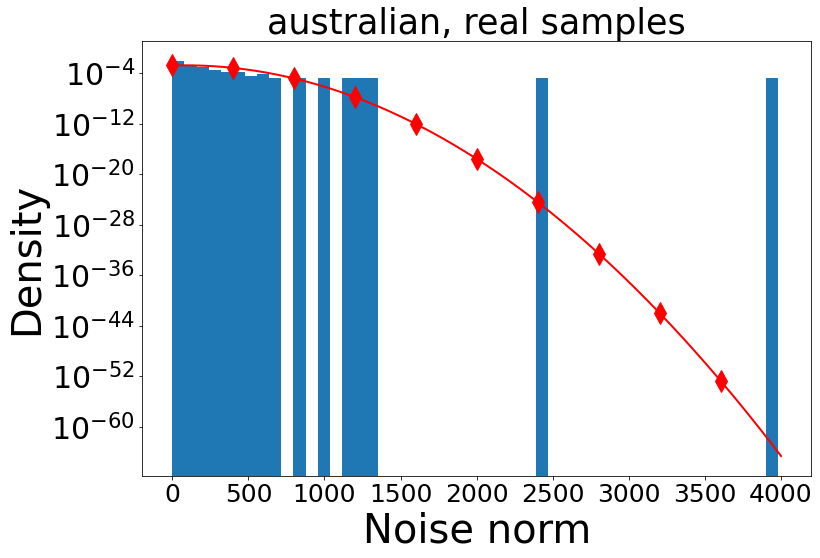

In [10]:
plt.figure(figsize=(12,8))
plt.xticks(fontsize=25)
plt.yticks(fontsize=30)
t, bins, patches = plt.hist(np.sort(grad_deviations), bins=50, density=1, log=True)
temp2 = np.linspace(0, 4000, 1000)
plt.semilogy(temp2, norm_d.pdf(temp2, mu, sigma), linewidth=2, color='red', marker='d',
            markersize = 15, 
            markevery=range(0, 1000, 100))
plt.title('australian, real samples', fontsize=35)
plt.xlabel("Noise norm", fontsize=40)
plt.ylabel("Density", fontsize=40)
plt.savefig("plot/australian_real.pdf", bbox_inches='tight')

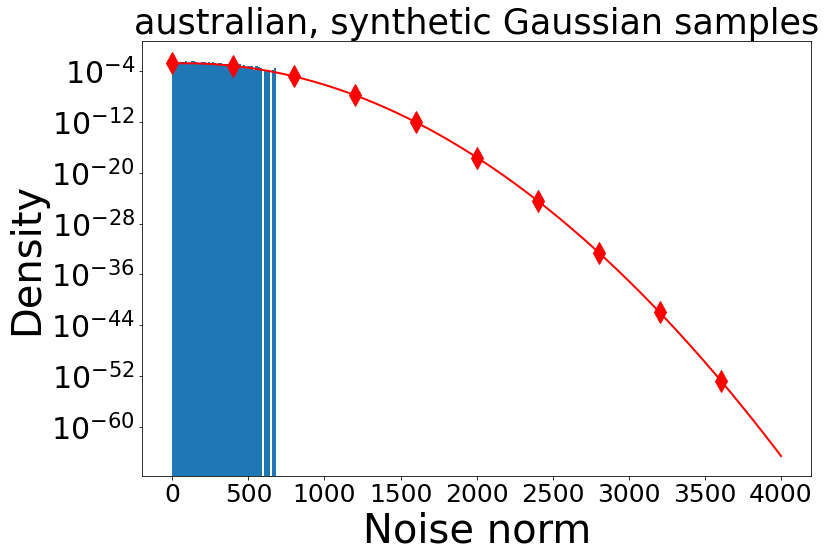

In [11]:
plt.figure(figsize=(12,8))
plt.xticks(fontsize=25)
plt.yticks(fontsize=30)
sample = norm_d.rvs(loc=mu, scale=sigma, size=m)
sample = sample[sample > 0]
t, bins, patches = plt.hist(sample, bins=50, density=(1 - norm_d.cdf(0,loc=mu,scale=sigma)), log=True)
temp2 = np.linspace(0, 4000, 1000)
plt.semilogy(temp2, norm_d.pdf(temp2, mu, sigma), linewidth=2, color='red', marker='d',
            markersize = 15, 
            markevery=range(0, 1000, 100))
plt.title('australian, synthetic Gaussian samples', fontsize=35)
plt.xlabel("Noise norm", fontsize=40)
plt.ylabel("Density", fontsize=40)
plt.savefig("plot/australian_synthetic.pdf", bbox_inches='tight')

### Tests

In [12]:
shift_param = 0.1
filename=dataset+"_x_star_shifted_by_all_ones_shift_"+str(shift_param)
l2 = 0
l1 = 0
batch_size = 50
M = int(2*m/batch_size)
gamma = 1.0/(L+l2)
x_star = read_solution(dataset, l2, l1)[0]
f_star = read_solution(dataset, l2, l1)[1]
x_init = x_star + shift_param*np.ones(n)
lambd = 2*np.sqrt(2)*(L+l2)*norm(x_star-x_init)*0.0000025
lambd_schedule = [lambd, 1000, 0.9]
S = 50000
save_info_period = 100
beta = 0.001
N = int(S*m/batch_size)
a = ((np.log(4*N/beta)) ** 2)
print("a = ", a)

B = norm(x_star-x_init) / (np.log(4*N/beta))
print("B = ", B)

sparse_full = False
sparse_stoch = False

a =  472.5622308055115
B =  0.017212125888760244


In [13]:
print("gamma = ", gamma)

gamma =  1.4212044303624118e-07


In [14]:
print("Initial value: ", logreg_loss(x_init, [denseA,y,l2,False,0]))

Initial value:  23.835410385911878


In [15]:
print(lambd)

18.61626135228073


### SSTM

In [16]:
%%time
### ???
res = clipped_sstm(filename=filename, x_init=x_init, A=A, y=y, a=a,
             B=B, L=L+l2, l2=l2, 
             sparse_full=sparse_full, sparse_stoch=sparse_stoch, 
             S=S, max_t=np.inf,
             batch_size=batch_size, indices=None, save_info_period=save_info_period, 
             x_star=x_star, f_star=f_star)

CPU times: user 1min 11s, sys: 223 ms, total: 1min 11s
Wall time: 1min 12s


### SGD and clipped-SGD

In [17]:
%%time
lambd_schedule = [2*np.sqrt(2)*(L+l2)*norm(x_star-x_init)*0.00001, 1500, 0.9]
res = clipped_sgd_const_stepsize_decr_clip(filename=filename, x_init=x_init, A=A, y=y, gamma=gamma,
     lambd_schedule=lambd_schedule, l2=l2, 
     sparse_full=sparse_full, sparse_stoch=sparse_stoch, 
     l1=l1, S=S, max_t=np.inf,
     batch_size=batch_size, indices=None, save_info_period=save_info_period, 
     x_star=x_star, f_star=f_star)
#print("Value: ", res['func_vals'][-1]+f_star)

CPU times: user 54.6 s, sys: 47.6 ms, total: 54.7 s
Wall time: 54.8 s


In [18]:
%%time
res = clipped_sgd_const_stepsize(filename=filename, x_init=x_init, A=A, y=y, gamma=gamma,
     lambd=lambd, l2=l2, 
     sparse_full=sparse_full, sparse_stoch=sparse_stoch, 
     l1=l1, S=S, max_t=np.inf,
     batch_size=batch_size, indices=None, save_info_period=save_info_period, 
     x_star=x_star, f_star=f_star)
#print("Value: ", res['func_vals'][-1]+f_star)

CPU times: user 57.7 s, sys: 99.3 ms, total: 57.8 s
Wall time: 58.1 s


In [19]:
%%time
res = sgd_const_stepsize(filename=filename, x_init=x_init, A=A, y=y, gamma=gamma,
     l2=l2, 
     sparse_full=sparse_full, sparse_stoch=sparse_stoch, 
     l1=l1, S=S, max_t=np.inf,
     batch_size=batch_size, indices=None, save_info_period=save_info_period, 
     x_star=x_star, f_star=f_star)
#print("Value: ", res['func_vals'][-1]+f_star)

CPU times: user 46.7 s, sys: 55.7 ms, total: 46.7 s
Wall time: 46.9 s


In [20]:
print(lambd_schedule[0])

74.46504540912292


FileNotFoundError: [Errno 2] No such file or directory: 'dump/australian_x_star_shifted_by_all_ones_shift_0.1_clipped-SSTM_a_1000.0_B_0.00017212125888760245_L_7036285.411416828_l2_0_num_of_epochs_50000_batch_size_50.txt'

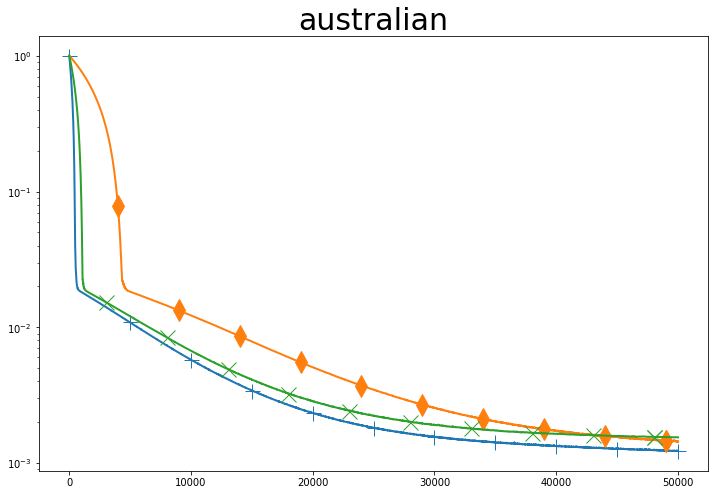

In [21]:
methods = [
         ['SGD_const_stepsize', [gamma, l2, l1, S, batch_size], 
           'SGD', None],
         ['clipped-SGD_const_stepsize', [gamma, lambd, l2, l1, S, batch_size], 
           'clipped-SGD', None],
         ['clipped-SGD_const_stepsize_decr_clip', [gamma, 
                                                   lambd_schedule,
                                                   l2, l1, S, batch_size], 
           'd-clipped-SGD', None],
           ['clipped-SSTM', [1000.0, B*0.01, L+l2, l2, S, batch_size], 
           'clipped-SSTM', None],
        ['SSTM', [1000.0, L+l2, l2, S, batch_size], 
           'SSTM', None],
]
mode_y = 'func_vals'
mode_x = 'data_passes'
figsize = (12, 8)
title_size = 30
linewidth = 2
markersize = 15
legend_size = 25
xlabel_size = 30
ylabel_size = 40
xticks_size = 20
yticks_size = 30
sizes = [title_size, linewidth, markersize, legend_size, xlabel_size, ylabel_size, xticks_size, yticks_size]
title = dataset
bbox_to_anchor = (1,1)
legend_loc="upper right"


save_fig = [True, filename+"_test_test.pdf"]

args_for_plots = [filename, mode_y, mode_x, figsize, sizes, title, methods, bbox_to_anchor, legend_loc, save_fig]
make_plots(args_for_plots)

In [ ]:
res = read_results_from_file(filename, 'SGD_const_stepsize', [gamma, l2, l1, S, batch_size])

In [25]:
%%time
x = deepcopy(res['last_iter'])
grad_deviations = np.array([])
full_grad = logreg_grad(x, [denseA,y,0,False])
for i in range(m):
    grad_deviations = np.append(grad_deviations, np.linalg.norm(logreg_grad(x, [denseA[[i]],y[[i]],0,False]) - full_grad))

CPU times: user 82.3 ms, sys: 104 ms, total: 186 ms
Wall time: 65.2 ms


In [26]:
print(norm(full_grad))

3.6657165213009772


In [27]:
mu = np.mean(grad_deviations)
sigma = np.sqrt(np.mean(grad_deviations**2 - mu))
print(mu)
print(sigma)

78.68333425323858
248.96353661019347


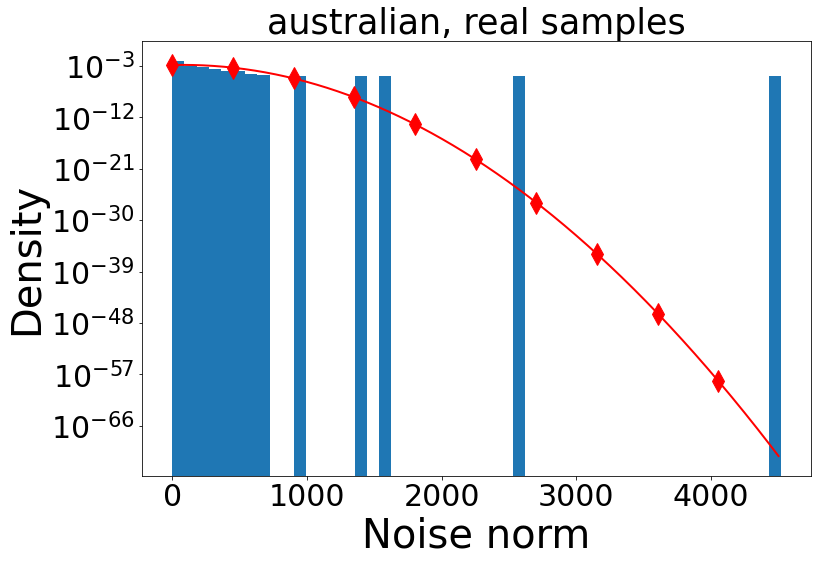

In [28]:
plt.figure(figsize=(12,8))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
t, bins, patches = plt.hist(np.sort(grad_deviations), bins=50, density=1, log=True)
temp2 = np.linspace(0, 4500, 1000)
plt.semilogy(temp2, norm_d.pdf(temp2, mu, sigma), linewidth=2, color='red', marker='d',
            markersize = 15, 
            markevery=range(0, 1000, 100))
plt.title('australian, real samples', fontsize=35)
plt.xlabel("Noise norm", fontsize=40)
plt.ylabel("Density", fontsize=40)
plt.savefig("plot/australian_sgd_last_point_big_step.pdf", bbox_inches='tight')

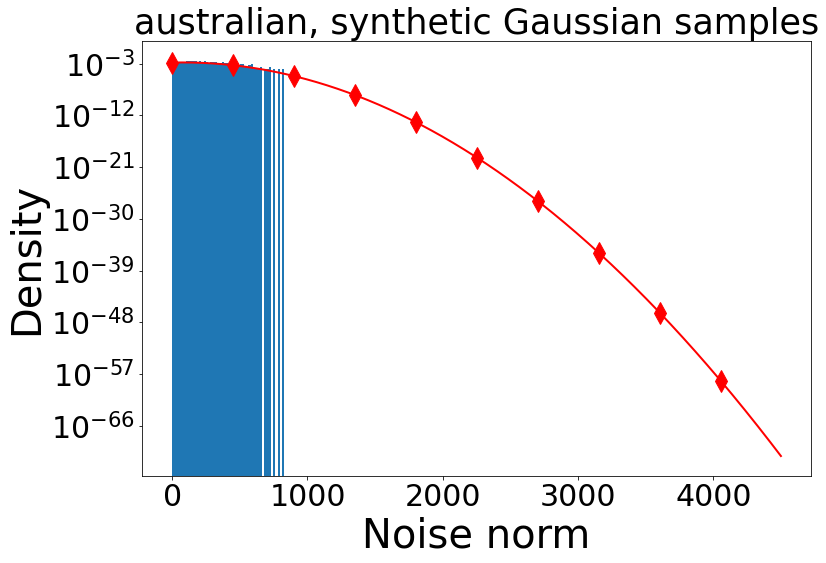

In [29]:
plt.figure(figsize=(12,8))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
sample = norm_d.rvs(loc=mu, scale=sigma, size=m)
sample = sample[sample > 0]
t, bins, patches = plt.hist(sample, bins=50, density=(1 - norm_d.cdf(0,loc=mu,scale=sigma)), log=True)
temp2 = np.linspace(0, 4500, 1000)
plt.semilogy(temp2, norm_d.pdf(temp2, mu, sigma), linewidth=2, color='red', marker='d',
            markersize = 15, 
            markevery=range(0, 1000, 100))
plt.title('australian, synthetic Gaussian samples', fontsize=35)
plt.xlabel("Noise norm", fontsize=40)
plt.ylabel("Density", fontsize=40)
plt.savefig("plot/australian_synthetic_sgd_last_iter_big_step.pdf", bbox_inches='tight')

In [30]:
res = read_results_from_file(filename, 'SGD_const_stepsize', [1.0/(L+l2), l2, l1, S, batch_size])

In [31]:
%%time
x = deepcopy(res['last_iter'])
grad_deviations = np.array([])
full_grad = logreg_grad(x, [denseA,y,0,False])
for i in range(m):
    grad_deviations = np.append(grad_deviations, np.linalg.norm(logreg_grad(x, [denseA[[i]],y[[i]],0,False]) - full_grad))

CPU times: user 62.4 ms, sys: 47.7 ms, total: 110 ms
Wall time: 59 ms


In [32]:
print(norm(full_grad))

3.6657165213009772


In [33]:
mu = np.mean(grad_deviations)
sigma = np.sqrt(np.mean(grad_deviations**2 - mu))
print(mu)
print(sigma)

78.68333425323858
248.96353661019347


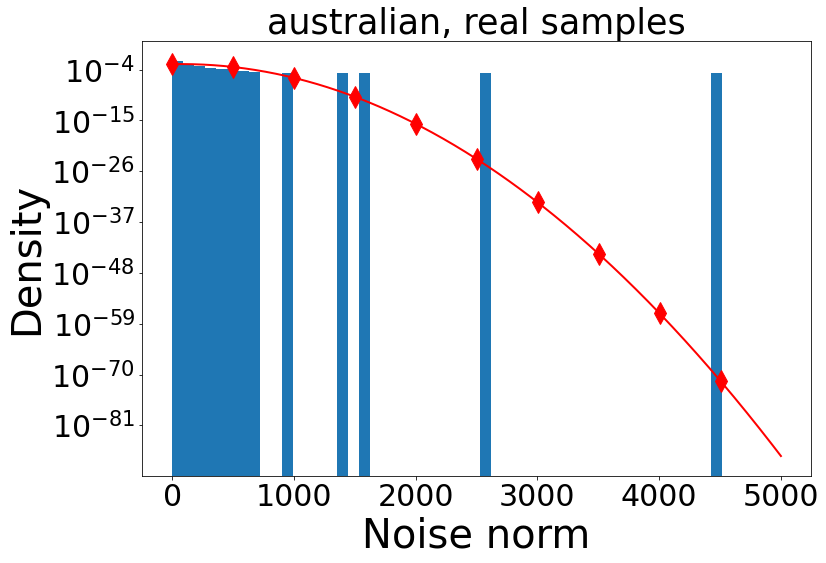

In [34]:
plt.figure(figsize=(12,8))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
t, bins, patches = plt.hist(np.sort(grad_deviations), bins=50, density=1, log=True)
temp2 = np.linspace(0, 5000, 1000)
plt.semilogy(temp2, norm_d.pdf(temp2, mu, sigma), linewidth=2, color='red', marker='d',
            markersize = 15, 
            markevery=range(0, 1000, 100))
plt.title('australian, real samples', fontsize=35)
plt.xlabel("Noise norm", fontsize=40)
plt.ylabel("Density", fontsize=40)
plt.savefig("plot/australian_sgd_last_point_small_step.pdf", bbox_inches='tight')

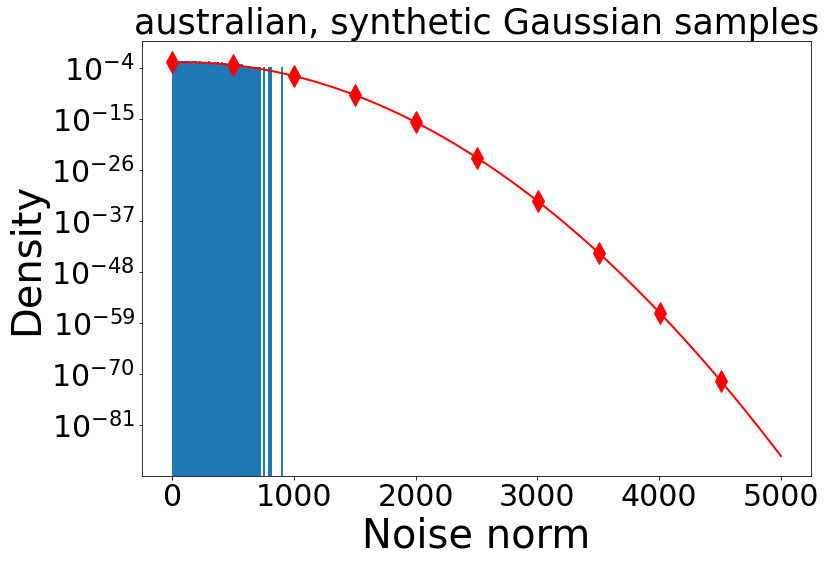

In [35]:
plt.figure(figsize=(12,8))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
sample = norm_d.rvs(loc=mu, scale=sigma, size=m)
sample = sample[sample > 0]
t, bins, patches = plt.hist(sample, bins=50, density=(1 - norm_d.cdf(0,loc=mu,scale=sigma)), log=True)
# t, bins, patches = plt.hist(np.where(sample>0, sample, 0), bins=50, density=1, log=True)
temp2 = np.linspace(0, 5000, 1000)
# plt.plot(temp2, norm_d.pdf(temp2, mu, sigma))
plt.semilogy(temp2, norm_d.pdf(temp2, mu, sigma), linewidth=2, color='red', marker='d',
            markersize = 15, 
            markevery=range(0, 1000, 100))
plt.title('australian, synthetic Gaussian samples', fontsize=35)
plt.xlabel("Noise norm", fontsize=40)
plt.ylabel("Density", fontsize=40)
plt.savefig("plot/australian_synthetic_sgd_last_iter_small_step.pdf", bbox_inches='tight')